In [277]:
#Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Set pandas options
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [278]:
#Create a list of PM2.5 dataframes
frames = []

for i in range(0,22):
    if i < 6:
        frames.append(pd.read_csv(f'PM25_200{i}.csv'))
        frames[i]['Date//Date'] = pd.to_datetime(frames[i]['Date//Date'], format='%Y%m%d')
    elif i < 10:
        frames.append(pd.read_csv(f'PM25_200{i}.csv'))
        frames[i]['Date//Date'] = pd.to_datetime(frames[i]['Date//Date'])
    else:
        frames.append(pd.read_csv(f'PM25_20{i}.csv'))
        frames[i]['Date//Date'] = pd.to_datetime(frames[i]['Date//Date'])

for i in range(95,100):
    frames.append(pd.read_csv(f'PM25_19{i}.csv'))

for i in range(22,27):
    frames[i]['Date//Date'] = pd.to_datetime(frames[i]['Date//Date'], format='%Y%m%d')

In [279]:
df = pd.concat(frames) #Concat the frames
df =df.replace(-999, np.NaN) #Set null values
df['Daily Mean'] = df.loc[:, 'H01//H01':'H24//H24'].mean(axis=1) #Create the daily mean
df[df['Province/Territory//Province/Territoire'] == 'ON']['City//Ville'].unique()

array(['Ottawa', 'Windsor', 'Toronto', 'Mississauga', 'Brampton',
       'Hamilton', 'Sault Ste Marie', 'Sarnia', 'St. Catharines',
       'Kitchener', 'Oshawa', 'Guelph', 'North Bay', 'Tiverton', 'Simcoe',
       'Dorset', 'Thunder Bay', 'London', 'Peterborough', 'Burlington',
       'Barrie', 'Newmarket', 'Port Stanley', 'Belleville', 'Kingston',
       'Cornwall', 'Oakville', 'Merlin', 'Grand Bend', 'Parry Sound',
       'Sudbury', 'Brantford', 'Essex', 'Morrisburg', 'Chatham',
       'Sault Ste. Marie', 'Petawawa', 'Milton'], dtype=object)

In [280]:
national_smoke = pd.DataFrame.copy(df) #Create new data frame
national_smoke = national_smoke[['Date//Date','City//Ville','Daily Mean']].rename(columns={'Date//Date':'date','Daily Mean':'mean_pm25','City//Ville':'city'}) #take out only important columns
national_smoke = national_smoke.groupby(['date','city']).mean().reset_index() #Take provincial means

In [281]:
national_smoke['city'] = national_smoke['city'].replace({
    'Metro Van - New Westminster': 'Vancouver',
    'Metro Van - Delta': 'Vancouver',
    'Metro Van - Surrey': 'Vancouver',
    'Metro Van - North Vancouver': 'Vancouver',
    'Metro Van - Burnaby': 'Vancouver',
    'Burnaby': 'Vancouver',
    'Metro Van - Port Moody': 'Vancouver',
    'Port Moody': 'Vancouver',
    'Metro Van - Richmond': 'Vancouver',
    'Richmond': 'Vancouver',
    'Metro Van - Vancouver': 'Vancouver',
    'Metro Van - West Vancouver': 'Vancouver',
    'Metro Van-Chilliwack': 'Vancouver',
    'Chilliwack': 'Vancouver',
    'Metro Van-Hope': 'Vancouver',
    'Hope': 'Vancouver',
    'Metro Van-Langley': 'Vancouver',
    'Langley': 'Vancouver',
    'Metro Van-Pitt Meadows': 'Vancouver',
    'Pitt Meadows': 'Vancouver',
})

In [282]:
national_smoke['city'] = national_smoke['city'].replace({
    'Mission': 'Abbotsford - Mission',
    'Abbotsford':'Abbotsford - Mission',
    'Metro Van - Abbotsford':'Abbotsford - Mission'
    
})

In [283]:
national_smoke['city'] = national_smoke['city'].replace({
    'Ottawa':'Ottawa-Gatineau',
    'Gatineau':'Ottawa-Gatineau'
})

In [284]:
national_smoke['city'] = national_smoke['city'].replace({
    'Levis':'Quebec',
    'Québec':'Quebec'
})

In [285]:
national_smoke['city'] = national_smoke['city'].replace({
    'Burlington':'Hamilton'
})

In [286]:
national_smoke['city'] = national_smoke['city'].replace({
    'Cornwall':'Charlottetown'
})

In [287]:
national_smoke['city'] = national_smoke['city'].replace({
    'Bruderheim':'Edmonton',
    'Fort Saskatchewan':'Edmonton',
    'Gibbons':'Edmonton',
    'Redwater':'Edmonton',
    'St. Albert':'Edmonton',
    'Thorsby':'Edmonton'
})

In [288]:
national_smoke['city'] = national_smoke['city'].replace({
    'Airdrie':'Calgary'
})

In [289]:
national_smoke['city'] = national_smoke['city'].replace({
    'Montréal':'Montreal',
    'Brossard':'Montreal',
    'Laval':'Montreal',
    'Longueuil':'Montreal',
    "L'assomption":'Montreal',
    'Saint-Jean-Sur-Richelieu':'Montreal',
    'Terrebonne':'Montreal'
})

In [290]:
national_smoke['city'] = national_smoke['city'].replace({
    'Mount Pearl':"St. John's",
    'St Johns':"St. John's"
})

In [291]:
national_smoke['city'] = national_smoke['city'].replace({
    'Brampton':'Toronto',
    'Milton':'Toronto',
    'Mississauga':'Toronto',
    'Newmarket':'Toronto',
    'Oakville':'Toronto'
})

In [292]:
national_smoke['city'] = national_smoke['city'].replace({
    'Becancour':'Trois-Rivieres',
    'Trois Rivi?Res':'Trois-Rivieres',
    'Trois-Rivières':'Trois-Rivieres',
    'Trois Rivières':'Trois-Rivieres'
})

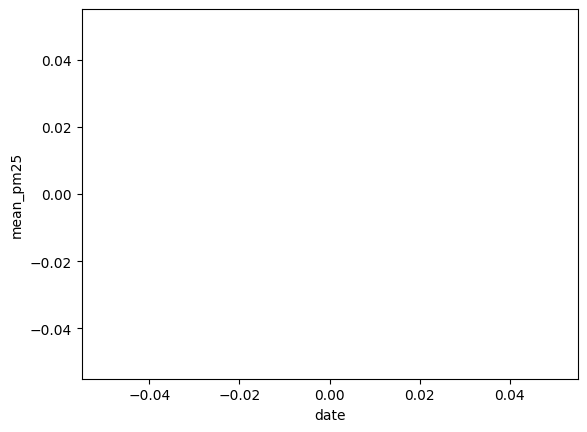

In [293]:
sns.lineplot(data=national_smoke[national_smoke['city'] == 'Metro Van - New Westminster'], y='mean_pm25', x='date')
plt.show()

In [294]:
scope = national_smoke[(national_smoke['city'] == 'Metro Van - New Westminster')]
scope[scope['mean_pm25'].isin(scope['mean_pm25'].nlargest(4))]

,date,city,mean_pm25


In [295]:
national_smoke = national_smoke.groupby(['city','date'])['mean_pm25'].mean().reset_index()

In [296]:
national_smoke[national_smoke['city'] == 'Yellowknife']

,city,date,mean_pm25
944191,Yellowknife,2012-01-01,7.17
944192,Yellowknife,2012-01-02,4.54
944193,Yellowknife,2012-01-03,5.38
944194,Yellowknife,2012-01-04,3.79
944195,Yellowknife,2012-01-05,5.38
...,...,...,...
947839,Yellowknife,2021-12-27,5.42
947840,Yellowknife,2021-12-28,10.04
947841,Yellowknife,2021-12-29,5.33
947842,Yellowknife,2021-12-30,3.50


In [297]:
#Export as csv
national_smoke.to_csv('national_smoke.csv', index=False)

In [298]:
#Section off Cities
calgary_smoke = national_smoke[national_smoke['city'] == 'Calgary']
calgary_smoke.to_csv('calgary_smoke.csv', index=False)


In [299]:
halifax_smoke = national_smoke[national_smoke['city'] == 'Halifax']
halifax_smoke.to_csv('halifax_smoke.csv', index=False)

In [300]:
charlottetown_smoke = national_smoke[national_smoke['city'] == 'Charlottetown']
charlottetown_smoke.to_csv('charlottetown_smoke.csv', index=False)

In [301]:
iqaluit_smoke = national_smoke[national_smoke['city'] == 'Iqaluit']
iqaluit_smoke.to_csv('iqaluit_smoke.csv', index=False)

In [302]:
moncton_smoke = national_smoke[national_smoke['city'] == 'Moncton']
moncton_smoke.to_csv('moncton_smoke.csv', index=False)

In [303]:
montreal_smoke = national_smoke[national_smoke['city'] == 'Montreal']
montreal_smoke.to_csv('montreal_smoke.csv', index=False)

In [304]:
saskatoon_smoke = national_smoke[national_smoke['city'] == 'Saskatoon']
saskatoon_smoke.to_csv('saskatoon_smoke.csv', index=False)

In [305]:
st_johns_smoke = national_smoke[national_smoke['city'] == "St. John's"]
st_johns_smoke.to_csv('st_johns_smoke.csv', index=False)

In [306]:
toronto_smoke = national_smoke[national_smoke['city'] == 'Toronto']
toronto_smoke.to_csv('toronto_smoke.csv', index=False)

In [307]:
winnipeg_smoke = national_smoke[national_smoke['city'] == 'Winnipeg']
winnipeg_smoke.to_csv('winnipeg_smoke.csv', index=False)

In [308]:
yellowknife_smoke = national_smoke[national_smoke['city'] == 'Yellowknife']
yellowknife_smoke.to_csv('yellowknife_smoke.csv', index=False)

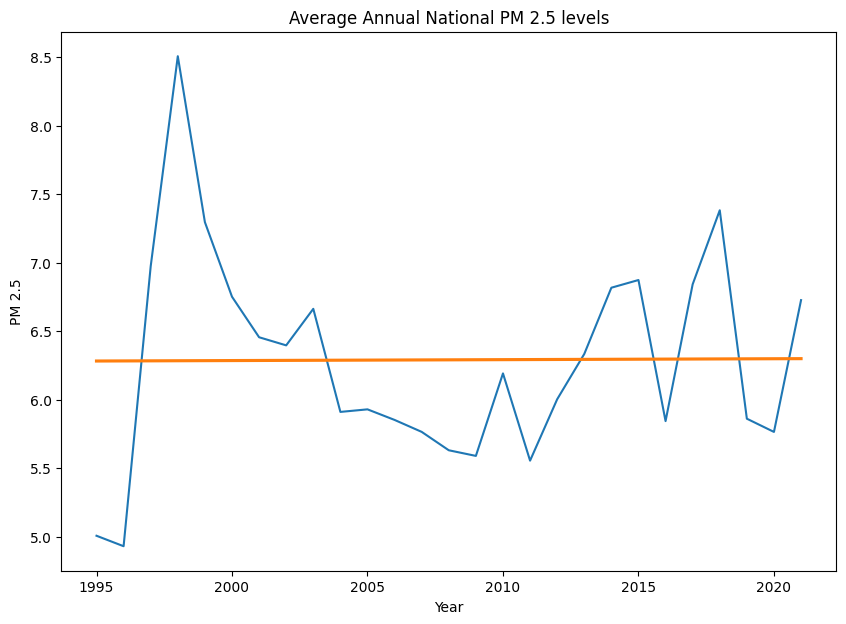

In [309]:
plt.figure(figsize=(10,7))
annual_avg = national_smoke.groupby(national_smoke['date'].dt.year).agg({'mean_pm25':'mean'}).reset_index()
sns.lineplot(data=annual_avg, x='date', y='mean_pm25')
sns.regplot(data=annual_avg, x='date', y='mean_pm25', scatter_kws={'s':0}, ci=False)
plt.xlabel('Year')
plt.ylabel('PM 2.5')
plt.title('Average Annual National PM 2.5 levels')
plt.show()

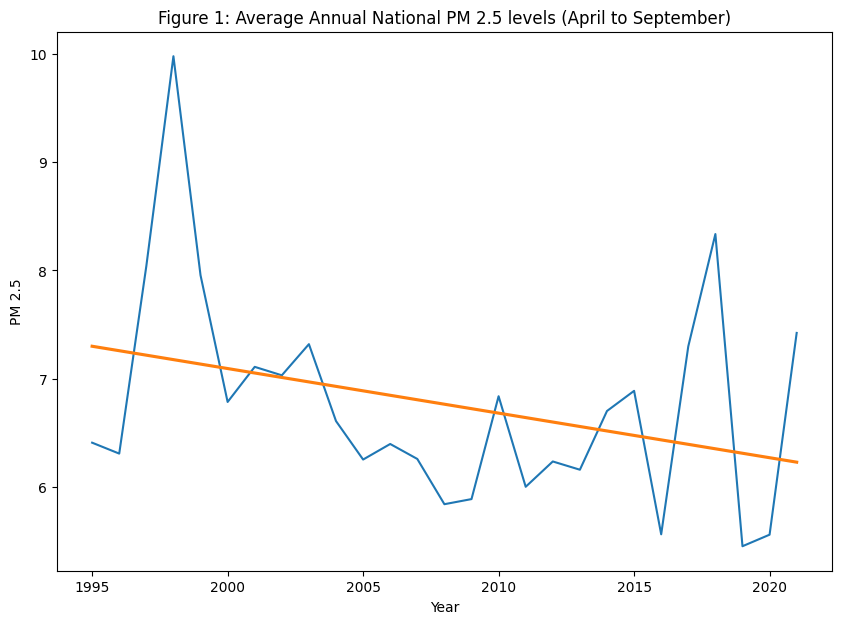

In [310]:
plt.figure(figsize=(10,7))
fire_season = ['April','May','June','July','August','September']
annual_season_avg = national_smoke[national_smoke['date'].dt.month_name().isin(fire_season)].groupby(national_smoke['date'].dt.year).agg({'mean_pm25':'mean'}).reset_index()
sns.lineplot(data=annual_season_avg, x='date', y='mean_pm25')
sns.regplot(data=annual_season_avg, x='date', y='mean_pm25', scatter_kws={'s':0}, ci=False)
plt.xlabel('Year')
plt.ylabel('PM 2.5')
plt.title('Figure 1: Average Annual National PM 2.5 levels (April to September)')
plt.show()